In [5]:
import pandas as pd 
import numpy as np
from scipy.stats import t

import matplotlib.pyplot as plt

In [27]:
x=np.arange(-5,10,0.1)

In [138]:
y2=t.pdf(x-4,df=10)
y1=t.pdf(x,df=10)

In [141]:
t1=t.ppf(0.975,10)
t1
xt=np.arange(t1,10,0.1)
yt=t.pdf(xt,10)
yt2=t.pdf(xt-4,10)

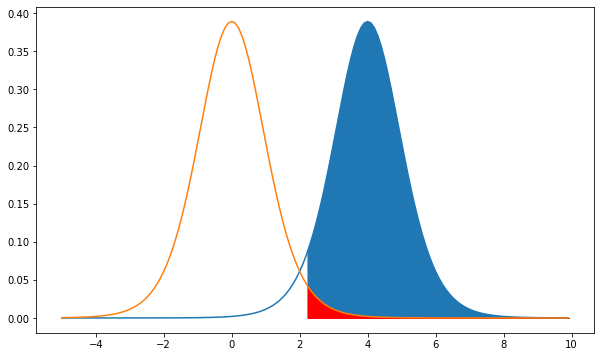

In [146]:
plt.figure(figsize=(10,6))
plt.plot(x,y2)
plt.plot(x,y1)
plt.fill_between(xt,yt,yt2)
plt.fill_between(xt,yt,color='red')

two sample T-test, $n=n_1=n_2$ and equal variances $\sigma=\sigma_1=\sigma_2$:

$$T=\frac{\bar{X}_1-\bar{X}_2}{\sigma_p\sqrt{\frac{2}{n}}}$$

and $$\sigma_p=\sigma/\sqrt{2}$$

Effect size:

$$d=\frac{\bar{X}_1-\bar{X}_2}{\sigma_p}$$

In [35]:
from statsmodels.stats.power import TTestIndPower


In [110]:
d=3
s_p=10
effect=d/s_p

In [127]:
power=0.85
alpha=0.05
analysis = TTestIndPower()
ds=[]
effects=np.random.random(10)
for d in effects:
    result = analysis.solve_power(d, power=power, nobs1=None, ratio=1.0, alpha=alpha)
    D=int(result)
    ds.append(D)

In [128]:
for n,ef in zip(ds,effects):
    t1=t.ppf(0.975,2*n)
    N=1-t.cdf(t1-ef*np.sqrt(n/2),2*n)
    print(N)

0.8499803007307295
0.8499970168730993
0.8462001131580055
0.8488191972665872
0.8482052801083888
0.8498052280205094
0.8497681357265696
0.849374235338233
0.8467361622253718
0.8473451209935401


In [161]:
analysis.solve_power(0.03, power=0.8, nobs1=None, ratio=1.0, alpha=0.05)

17442.872915839584

In [162]:
2*(1.96+0.842)**2/0.03**2

17447.12